In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap

# construct cmap
palette = ["#84a98c","#588157","#dad7cd","#3a5a40","#344e41"]


# Primer Vistazo

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/cuestionario_satisfaccion.xlsx")

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
print(f"La tabla tiene {df.shape[0]} filas y {df.shape[1]} columnas")

La tabla tiene 25976 filas y 25 columnas


# Limpieza de los datos

In [ ]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
print(f"Hay un total de {df.duplicated().sum()} filas duplicadas")

Hay un total de 0 filas duplicadas


In [ ]:
df.loc[df[df["Age"]<=18].index,"Age group"] = "Teen"
df.loc[df[(df["Age"]>18) & (df["Age"]<=30)].index,"Age group"] = "Young"
df.loc[df[(df["Age"]>30) & (df["Age"]<=60)].index,"Age group"] = "Adult"
df.loc[df[df["Age"]>60].index,"Age group"] = "Senior"

In [ ]:
df[["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
"Gate location","Food and drink","Online boarding","Seat comfort",
"Inflight entertainment","On-board service","Leg room service",
"Baggage handling","Checkin service","Inflight service","Cleanliness"]] = \
df[["Inflight wifi service", "Departure/Arrival time convenient",
"Ease of Online booking","Gate location","Food and drink","Online boarding",
"Seat comfort","Inflight entertainment","On-board service","Leg room service",
"Baggage handling","Checkin service","Inflight service","Cleanliness"]].replace(0, np.nan)

# Análisis Exploratorio

## Perfilado de clientes

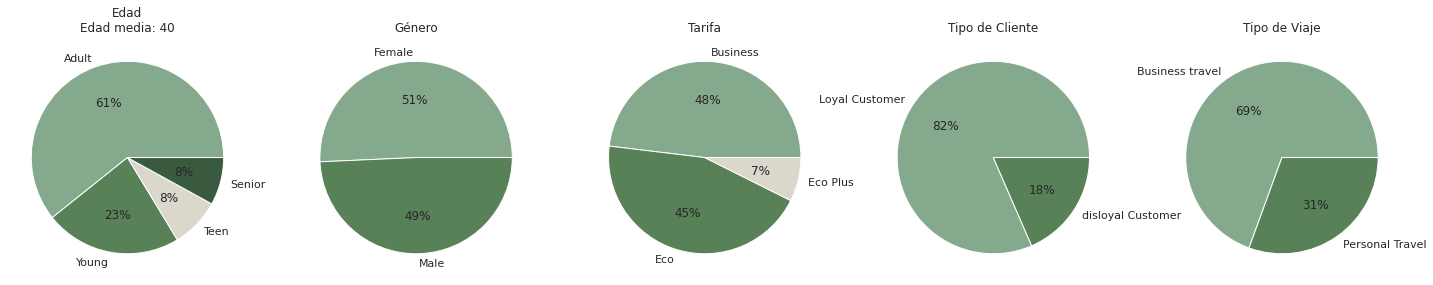

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(25,5))
dimensions = ['Age group', 'Gender','Class','Customer Type','Type of Travel']
labels = ["Edad","Género","Tarifa","Tipo de Cliente","Tipo de Viaje"]
for i,elem in enumerate(dimensions):
  ax[i].pie(df[elem].value_counts(), labels = df[elem].value_counts().index, autopct='%.0f%%', colors = palette )
  ax[i].set_title(labels[i])
ax[0].set_title(f"Edad\nEdad media: {int(np.round(df['Age'].mean(),0))}");

In [ ]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age group
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5.0,4.0,...,5.0,5.0,5,2,5.0,5.0,50,44.0,satisfied,Adult
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1.0,1.0,...,4.0,4.0,4,3,4.0,5.0,0,0.0,satisfied,Adult
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2.0,NaN,...,4.0,1.0,3,2,2.0,2.0,0,0.0,neutral or dissatisfied,Young
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,NaN,NaN,...,1.0,1.0,1,3,1.0,4.0,0,6.0,satisfied,Adult
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2.0,3.0,...,2.0,2.0,2,4,2.0,4.0,0,20.0,satisfied,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3.0,3.0,...,3.0,2.0,4,4,5.0,4.0,0,0.0,neutral or dissatisfied,Adult
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4.0,4.0,...,4.0,5.0,5,5,5.0,4.0,0,0.0,satisfied,Young
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2.0,5.0,...,4.0,3.0,4,5,4.0,2.0,0,0.0,neutral or dissatisfied,Teen
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3.0,3.0,...,3.0,2.0,5,4,5.0,4.0,0,0.0,satisfied,Teen


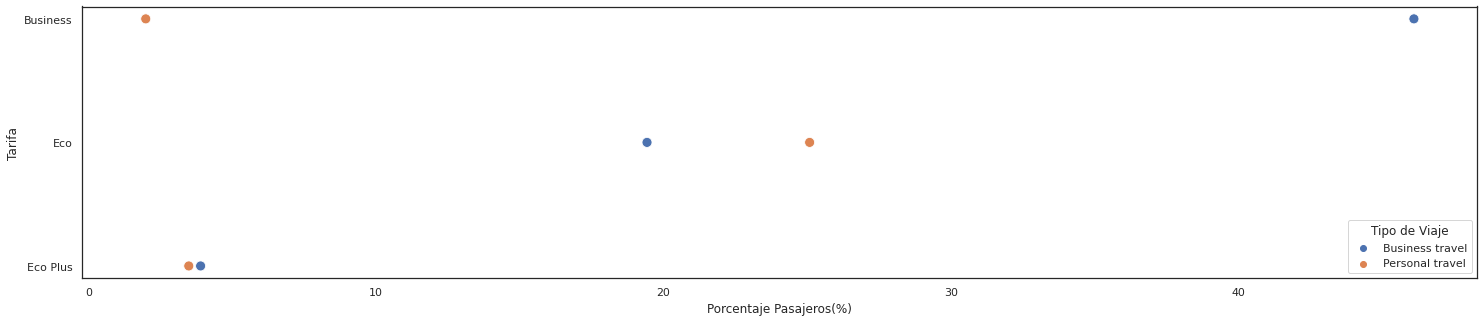

In [ ]:
temp = pd.DataFrame(pd.concat([df[(df["Type of Travel"]=="Business travel") & (df["satisfaction"]=="satisfied")]["Class"].value_counts(),
                               df[(df["Type of Travel"]=="Business travel") & (df["satisfaction"]!="satisfied")]["Class"].value_counts(),
                               df[(df["Type of Travel"]!="Business travel") & (df["satisfaction"]=="satisfied")]["Class"].value_counts(),
                               df[(df["Type of Travel"]!="Business travel") & (df["satisfaction"]!="satisfied")]["Class"].value_counts()]))

temp["Type of Travel"] = ["Business travel","Business travel","Business travel","Business travel","Business travel","Business travel",
                          "Personal travel","Personal travel","Personal travel","Personal travel","Personal travel","Personal travel"]
temp["Satisfaccion"] = ["Satisfied","Satisfied","Satisfied","Neutral or Dissatisfied","Neutral or Dissatisfied","Neutral or Dissatisfied",
                          "Satisfied","Satisfied","Satisfied","Neutral or Dissatisfied","Neutral or Dissatisfied","Neutral or Dissatisfied"]
temp.reset_index(inplace = True)

temp.columns = ["Tarifa","Porcentaje Pasajeros(%)","Tipo de Viaje","Satisfacción"]
temp["Porcentaje Pasajeros(%)"] = (temp["Porcentaje Pasajeros(%)"]/temp["Porcentaje Pasajeros(%)"].sum())*100
fig, ax = plt.subplots(1,1, figsize=(25,5))
sns.scatterplot(data=temp.groupby(["Tarifa", "Tipo de Viaje"]).sum().reset_index(), 
                x="Porcentaje Pasajeros(%)", hue="Tipo de Viaje", y="Tarifa",s=100)

In [ ]:
temp.sort_values(["Tarifa","Tipo de Viaje"])

,Tarifa,Porcentaje Pasajeros(%),Tipo de Viaje,Satisfacción
0,Business,33.249923,Business travel,Satisfied
4,Business,12.865722,Business travel,Neutral or Dissatisfied
8,Business,0.188636,Personal travel,Satisfied
11,Business,1.797813,Personal travel,Neutral or Dissatisfied
1,Eco,6.074838,Business travel,Satisfied
3,Eco,13.354635,Business travel,Neutral or Dissatisfied
6,Eco,2.556206,Personal travel,Satisfied
9,Eco,22.532338,Personal travel,Neutral or Dissatisfied
2,Eco Plus,1.520634,Business travel,Satisfied
5,Eco Plus,2.375269,Business travel,Neutral or Dissatisfied


In [ ]:
temp.groupby(["Tarifa", "Tipo de Viaje"]).sum().reset_index()

,Tarifa,Tipo de Viaje,Porcentaje Pasajeros(%)
0,Business,Business travel,46.115645
1,Business,Personal travel,1.986449
2,Eco,Business travel,19.429473
3,Eco,Personal travel,25.088543
4,Eco Plus,Business travel,3.895904
5,Eco Plus,Personal travel,3.483985


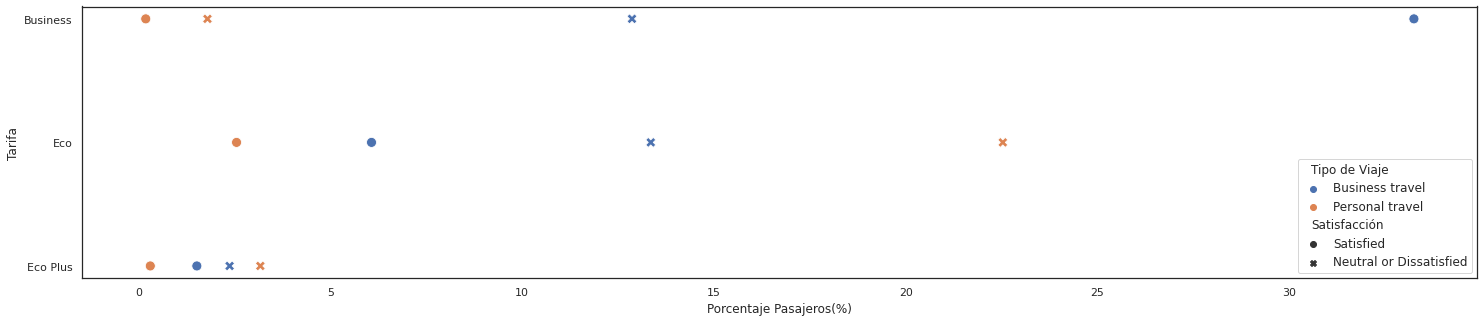

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(25,5))
sns.scatterplot(data=temp, x="Porcentaje Pasajeros(%)", y="Tarifa", hue="Tipo de Viaje",style="Satisfacción",s=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


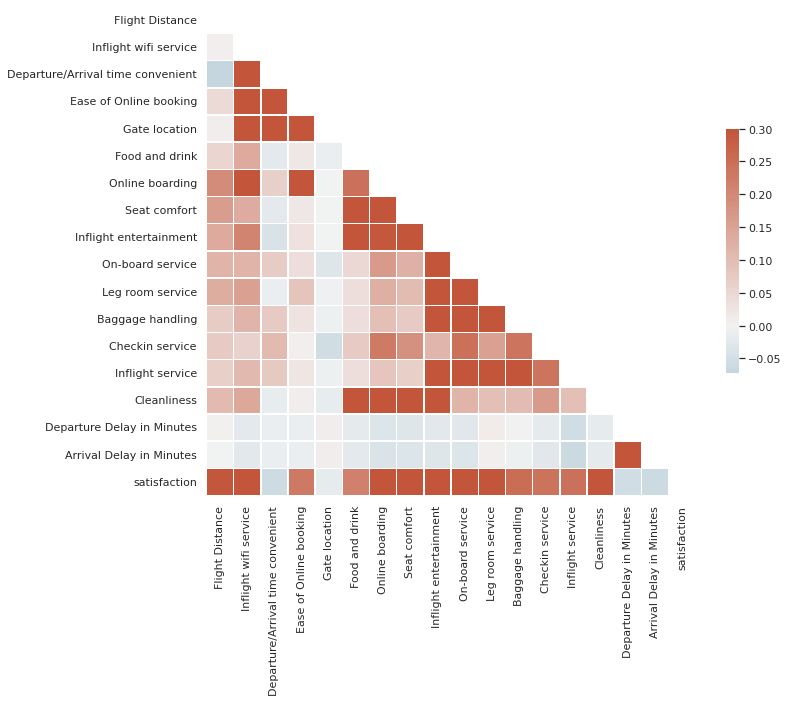

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
d = df[['Flight Distance',"Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
"Gate location","Food and drink","Online boarding","Seat comfort",
"Inflight entertainment","On-board service","Leg room service",
"Baggage handling","Checkin service","Inflight service","Cleanliness",'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']]
d["satisfaction"] = d["satisfaction"].replace(["satisfied","neutral or dissatisfied"],[1,0])

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Satisfacción de los clientes

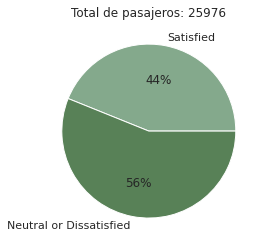

In [ ]:
#define data
data = [df[df["satisfaction"]=="satisfied"].shape[0], df[df["satisfaction"]!="satisfied"].shape[0]]
labels = ["Satisfied", "Neutral or Dissatisfied"]


#create pie chart
plt.pie(data, labels = labels, autopct='%.0f%%', colors = palette)
plt.title(f"Total de pasajeros: {data[0]+data[1]}")
plt.show()

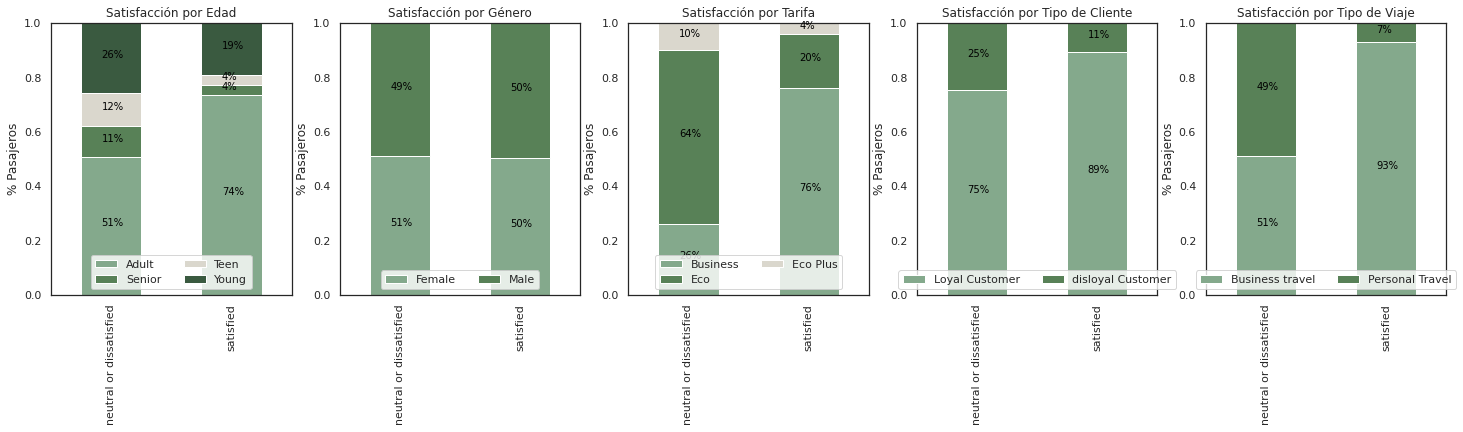

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(25,5))
lista = ['Age group', 'Gender','Class','Customer Type','Type of Travel']
lista_es = ['Edad', 'Género','Tarifa','Tipo de Cliente','Tipo de Viaje']

for i in range(5):
  column = lista[i]
  cross_tab_prop = pd.crosstab(index=df['satisfaction'],
                              columns=df[column],
                              normalize="index")
  cross_tab_prop.plot(kind='bar', 
                      stacked=True, 
                      color=palette, 
                      ax = ax[i])

  ax[i].set_title(f'Satisfacción por {lista_es[i]}')
  ax[i].legend(loc="lower center", ncol=2)
  ax[i].set_xlabel("")
  ax[i].set_ylim(0,1)
  ax[i].set_ylabel("% Pasajeros")

  for n, x in enumerate([*cross_tab_prop.index.values]):
      for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                    cross_tab_prop.loc[x].cumsum()):
                  
          ax[i].text(x=n - 0.08,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{int(np.round(proportion * 100, 0))}%', 
                  color="black",
                  fontsize=10)

plt.show()

# Areas de la encuesta

## División por secciones

In [ ]:
prev_vuelo = ["Departure/Arrival time convenient","Ease of Online booking","Online boarding"]
aeropuerto = ["Gate location","Baggage handling","Checkin service"]
vuelo = ["Food and drink","Inflight entertainment","Inflight service","Inflight wifi service","On-board service"]
asiento = ["Seat comfort","Leg room service","Cleanliness"]
areas = [prev_vuelo, aeropuerto, vuelo,asiento]

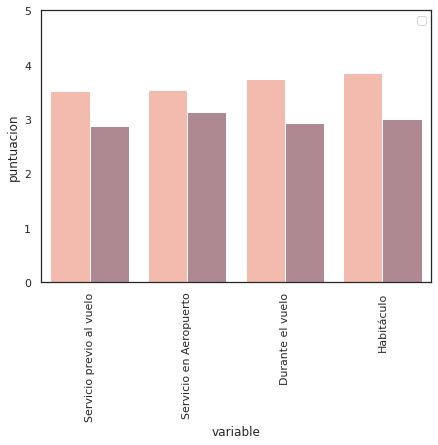

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

satisfechos = pd.DataFrame([pd.DataFrame(df[df["satisfaction"]=="satisfied"][prev_vuelo].mean()).mean(),
                            pd.DataFrame(df[df["satisfaction"]=="satisfied"][aeropuerto].mean()).mean(),
                            pd.DataFrame(df[df["satisfaction"]=="satisfied"][vuelo].mean()).mean(),
                            pd.DataFrame(df[df["satisfaction"]=="satisfied"][asiento].mean()).mean()], 
                           index = ["Servicio previo al vuelo", "Servicio en Aeropuerto","Durante el vuelo", "Habitáculo"])
satisfechos.reset_index(inplace=True)
satisfechos["satisfaccion"] = "Satisfechos"
insatisfechos = pd.DataFrame([pd.DataFrame(df[df["satisfaction"]!="satisfied"][prev_vuelo].mean()).mean(),
                            pd.DataFrame(df[df["satisfaction"]!="satisfied"][aeropuerto].mean()).mean(),
                            pd.DataFrame(df[df["satisfaction"]!="satisfied"][vuelo].mean()).mean(),
                            pd.DataFrame(df[df["satisfaction"]!="satisfied"][asiento].mean()).mean()], 
                           index = ["Servicio previo al vuelo", "Servicio en Aeropuerto","Durante el vuelo", "Habitáculo"])
insatisfechos.reset_index(inplace=True)
insatisfechos["satisfaccion"] = "Neutrales/Insatisfechos"
resume = pd.concat([satisfechos, insatisfechos])
resume.columns = ["variable","puntuacion","satisfaccion"]
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
palette2 ={"Satisfechos": "#ffb4a2", "Neutrales/Insatisfechos": "#b5838d"}
sns.barplot(data=resume, x="variable", y="puntuacion", hue="satisfaccion", ax = ax, palette=palette2)
ax.set_ylim(0,5)
ax.legend("")
ax.tick_params(axis='x', rotation=90);

In [ ]:
resume

,variable,puntuacion,satisfaccion
0,Servicio previo al vuelo,3.507338,Satisfechos
1,Servicio en Aeropuerto,3.527551,Satisfechos
2,Durante el vuelo,3.744475,Satisfechos
3,Habitáculo,3.848754,Satisfechos
0,Servicio previo al vuelo,2.879445,Neutrales/Insatisfechos
1,Servicio en Aeropuerto,3.136508,Neutrales/Insatisfechos
2,Durante el vuelo,2.931770,Neutrales/Insatisfechos
3,Habitáculo,2.990448,Neutrales/Insatisfechos


## Análisis por áreas

In [ ]:
print(f"Puntuación Media:{df[prev_vuelo+aeropuerto+vuelo+asiento].mean().mean()}")
pd.DataFrame([df[prev_vuelo+aeropuerto+vuelo+asiento].mean().values, 
              (df[prev_vuelo+aeropuerto+vuelo+asiento].mean()>df[prev_vuelo+aeropuerto+vuelo+asiento].mean().mean()).values,
              (df[prev_vuelo+aeropuerto+vuelo+asiento].mean()-df[prev_vuelo+aeropuerto+vuelo+asiento].mean().mean()).values*100],
             columns = [prev_vuelo+aeropuerto+vuelo+asiento],
             index = ["Media","Superior Media","Diferencia con Media"]).T

Puntuación Media:3.278922245028761


,Media,Superior Media,Diferencia con Media
Departure/Arrival time convenient,3.21789,False,-6.103243
Ease of Online booking,2.889714,False,-38.920835
Online boarding,3.34564,True,6.671825
Gate location,2.977094,False,-30.1828
Baggage handling,3.633238,True,35.431613
Checkin service,3.314175,True,3.525238
Food and drink,3.21845,False,-6.047209
Inflight entertainment,3.35827,True,7.93482
Inflight service,3.649534,True,37.06119
Inflight wifi service,2.812781,False,-46.614157


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


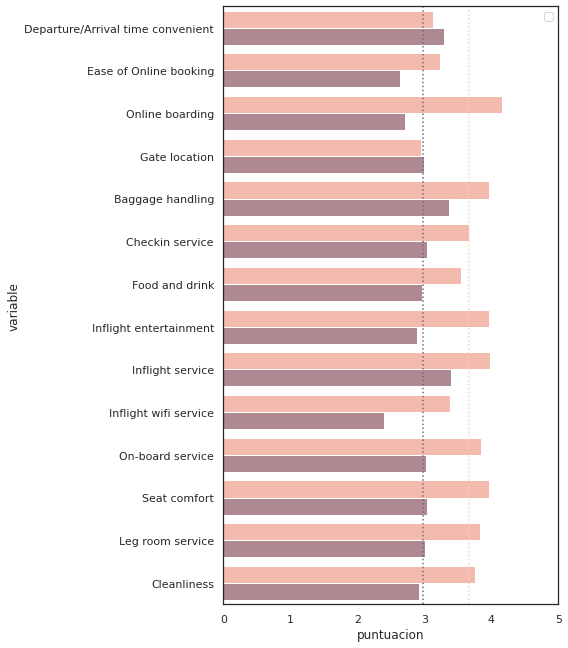

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6,11))
satisfechos = pd.DataFrame(df[df["satisfaction"]=="satisfied"][prev_vuelo+aeropuerto+vuelo+asiento].mean())
satisfechos.reset_index(inplace=True)
satisfechos["satisfaccion"] = "Satisfechos"
insatisfechos = pd.DataFrame(df[df["satisfaction"]!="satisfied"][prev_vuelo+aeropuerto+vuelo+asiento].mean())
insatisfechos.reset_index(inplace=True)
insatisfechos["satisfaccion"] = "Neutrales/Insatisfechos"
resume = pd.concat([satisfechos, insatisfechos])
resume.columns = ["variable","puntuacion","satisfaccion"]
sns.color_palette("blend:#7AB,#EDA", as_cmap=True)
palette2 ={"Satisfechos": "#ffb4a2", "Neutrales/Insatisfechos": "#b5838d"}
sns.barplot(data=resume, y="variable", x="puntuacion", hue="satisfaccion", ax = ax, palette=palette2)
plt.axvline(x = satisfechos.mean()[0], color = '#ffcdb2',ls=':')
plt.axvline(x = insatisfechos.mean()[0], color = '#6d6875',ls=':')
ax.set_xlim(0,5)
ax.legend("")
ax.tick_params(axis='x', rotation=0);



### Durante el vuelo (Servicio en vuelo y Habitáculo)

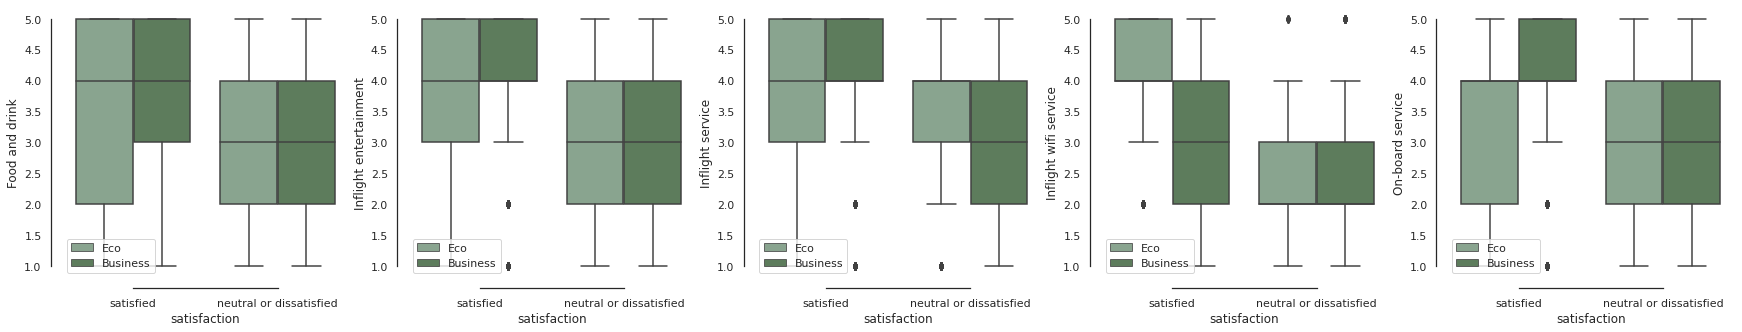

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(30,5))
for i,elem in enumerate(vuelo):

  sns.boxplot(x="satisfaction", y=elem,
              hue="Class", palette=palette,
              data=df[df["Class"]!="Eco Plus"], ax = ax[i])
  ax[i].legend(loc='lower left')

sns.despine(offset=10, trim=True)


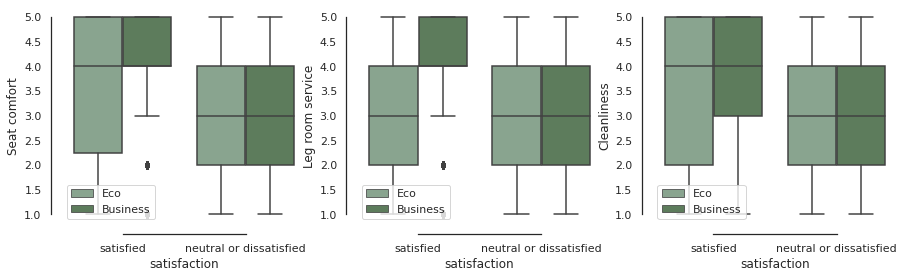

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
for i,elem in enumerate(asiento):

  sns.boxplot(x="satisfaction", y=elem,
              hue="Class", palette=palette,
              data=df[df["Class"]!="Eco Plus"], ax = ax[i])
  ax[i].legend(loc='lower left')

sns.despine(offset=10, trim=True)

## Importancia parámetros

Vamos a entrenar tres modelos de Regresión logistica para determinar la importancia de las variables

In [ ]:
df[df["Class"]=="Business"]['satisfaction'].value_counts()

satisfied                  8686
neutral or dissatisfied    3809
Name: satisfaction, dtype: int64

In [ ]:
X = df[prev_vuelo+aeropuerto+vuelo+asiento].fillna(2.5)
y = df['satisfaction']
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)

X = df[df["Class"]=="Eco"][prev_vuelo+aeropuerto+vuelo+asiento].fillna(2.5)
y = df[df["Class"]=="Eco"]['satisfaction']
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(random_state=0).fit(X, y)

X = df[df["Class"]=="Business"][prev_vuelo+aeropuerto+vuelo+asiento].fillna(2.5)
y = df[df["Class"]=="Business"]['satisfaction']
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
results = pd.DataFrame([np.exp(clf.coef_[0]),np.exp(clf2.coef_[0]),np.exp(clf3.coef_[0])], 
                                                    columns = df[prev_vuelo+aeropuerto+vuelo+asiento].columns.values, 
                                                    index = ["Todos","Eco","Business"]).T

ValueError: ignored

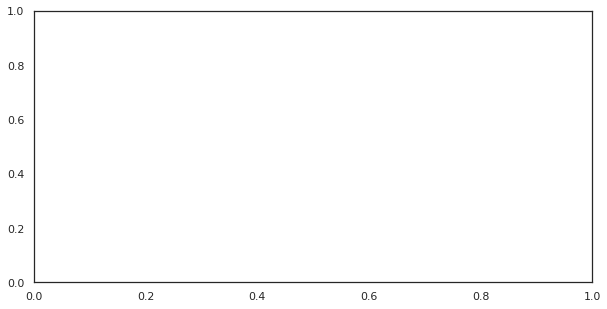

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x="Todos", y="index", data=results.sort_values("Todos", ascending=False,),
            label="Total", color="#84a98c")
plt.axvline(x = 1, color = 'r')
plt.title("Odd Ratio all passengers");
plt.ylabel("")
plt.xlabel("Odd Ratio");


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x="Eco", y="index", data=results.sort_values("Eco", ascending=False,),
            label="Total", color="#84a98c")
plt.axvline(x = 1, color = 'r')
plt.title("Odd Ratio Pasajeros Eco");
plt.ylabel("")
plt.xlabel("Odd Ratio");

ValueError: ignored

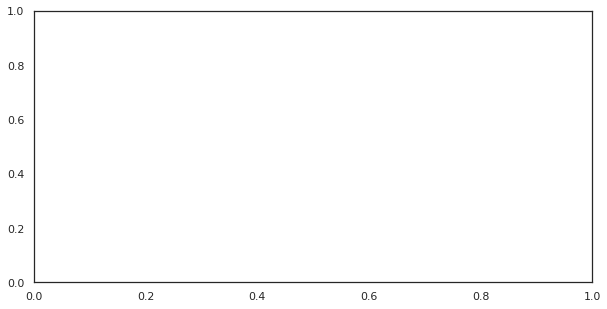

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x="Business", y="index", data=results.sort_values("Business", ascending=False,),
            label="Total", color="#84a98c")
plt.axvline(x = 1, color = 'r')
plt.title("Odd Ratio Pasajeros Business");
plt.ylabel("")
plt.xlabel("Odd Ratio");

## Importancia Parámetros Viaje Personal

In [ ]:
X = df[(df["Type of Travel"]>="Personal Travel")][prev_vuelo+aeropuerto+vuelo+asiento].fillna(2.5)
y = df[(df["Type of Travel"]>="Personal Travel")]['satisfaction']
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
results = pd.DataFrame([np.exp(clf4.coef_[0])],
                       columns = df[prev_vuelo+aeropuerto+vuelo+asiento].columns.values,
                       index = ["Personal"]).T.reset_index()

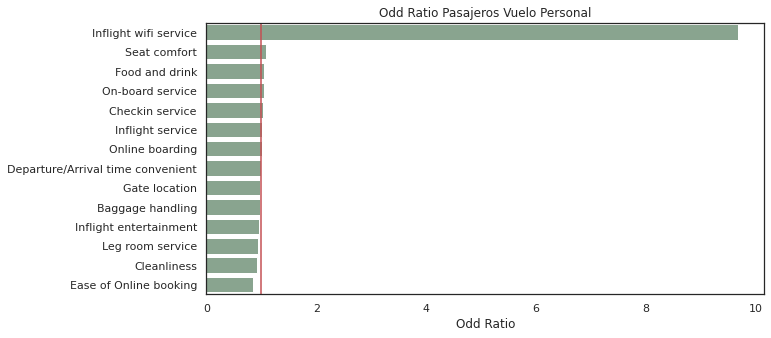

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x="Personal", y="index", data=results.sort_values("Personal", ascending=False,),
            label="Total", color="#84a98c")
plt.axvline(x = 1, color = 'r')
plt.title("Odd Ratio Pasajeros Vuelo Personal");
plt.ylabel("")
plt.xlabel("Odd Ratio");

## Satisfacción - Distancia y Delay

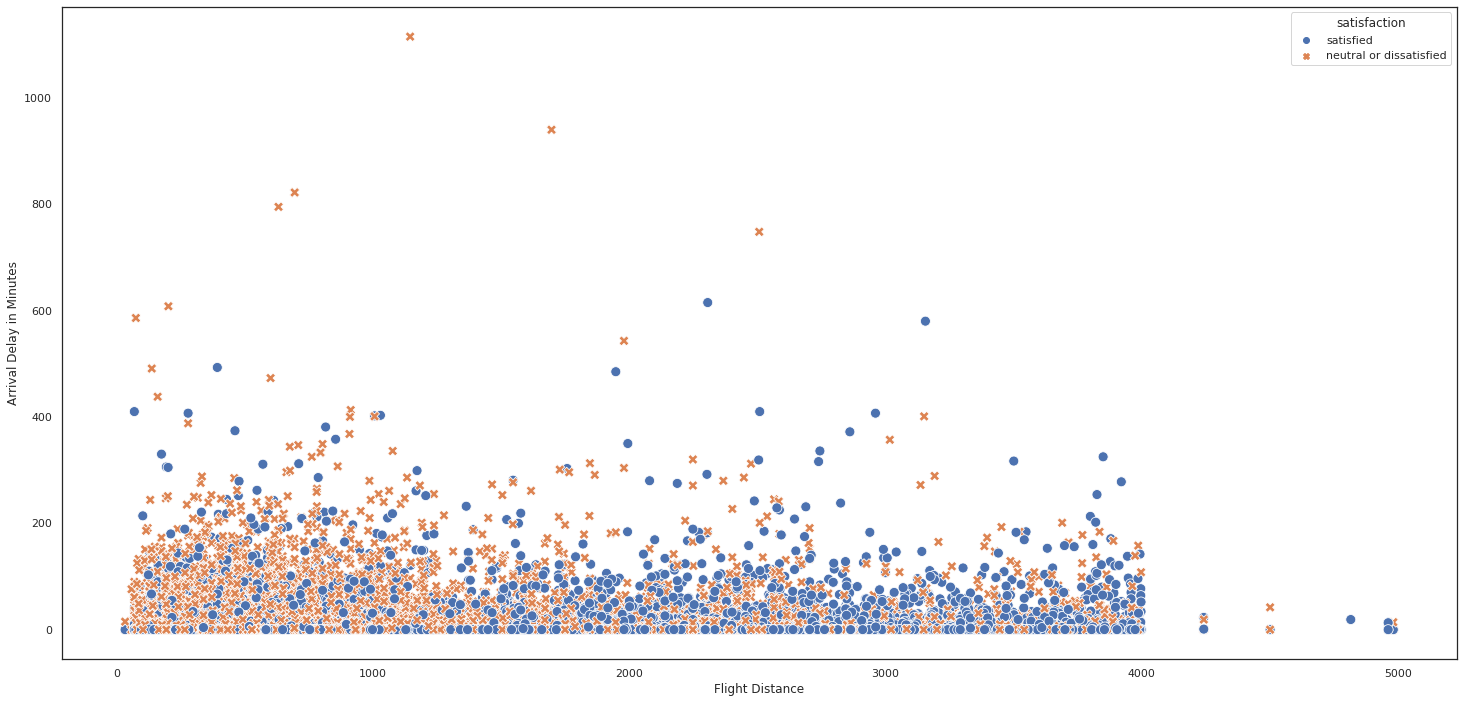

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(25,12))
sns.scatterplot(data=df, x="Flight Distance", y="Arrival Delay in Minutes", hue="satisfaction",style="satisfaction",s=100)

## Importancia parámetros en pasajeros de vuelo largo alcance y con retraso

In [ ]:
X = df[(df["Flight Distance"]>1500) & (df["Arrival Delay in Minutes"]>=100)][prev_vuelo+aeropuerto+vuelo+asiento].fillna(2.5)
y = df[(df["Flight Distance"]>1500) & (df["Arrival Delay in Minutes"]>=100)]['satisfaction']
from sklearn.linear_model import LogisticRegression
clf5 = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
results = pd.DataFrame([np.exp(clf5.coef_[0])],
                       columns = df[prev_vuelo+aeropuerto+vuelo+asiento].columns.values,
                       index = ["Delay"]).T.reset_index()

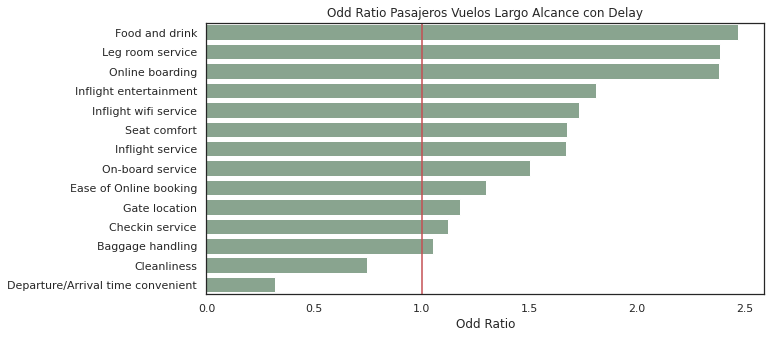

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x="Delay", y="index", data=results.sort_values("Delay", ascending=False,),
            label="Total", color="#84a98c")
plt.axvline(x = 1, color = 'r')
plt.title("Odd Ratio Pasajeros Vuelos Largo Alcance con Delay");
plt.ylabel("")
plt.xlabel("Odd Ratio");